In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Experience-Salary.csv")

In [3]:
#SUMMARY OF THE DATASET
dataset.describe()

,exp(in months),salary(in thousands)
count,1000.000000,1000.000000
mean,26.157825,26.722597
std,8.717091,8.844761
min,0.697594,-1.276342
25%,20.073600,20.531008
50%,25.875225,26.745576
75%,32.406986,32.615753
max,49.463222,55.297016


In [4]:
#FIRST FEW ROWS OF THE DATASET
dataset.head()

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236


In [5]:
#FIRST 800 ROWS ARE TAKEN FOR TRAINING

train_experience = dataset.iloc[0:800,0].values #first 800 rows of experience column
print(train_experience)
print("shape : ",train_experience.shape)

[18.29029332 17.02340669 26.34361348 19.10583387 27.74251647 31.67117131
 14.18639863 29.932845   32.84132735 26.87386911 41.51380791 32.20117764
 34.73822584 27.51493135 25.76125817 36.92531809 23.7470025  24.09348782
 16.13380215 23.252563   25.63058204 27.59918582 22.92110427 20.05168098
 24.98304725 33.91865279 44.45485384 19.58633061 18.51115733 31.54165401
 31.71843486 18.32610619 21.34802336 26.91006992 34.93973987 27.33055795
 21.36414187 29.78202486 15.74794461 14.39682659 28.50094976 21.88009726
 10.59131485 17.12255632 36.48815058 19.5314334  34.00288198 43.27144687
 20.47647992  4.93608379 21.17397468 34.39341812 27.06220405 33.72339535
 28.63074094 25.31227406 27.33759393 18.6145     31.87655812 34.60896563
 17.06008698 25.74391561 34.15232257 20.95214793 12.01485032 12.40825677
 29.33854386 31.20573764 23.96472542  7.30476267 36.81167311 19.96209511
 46.15479158 13.9119018  28.21940646 16.69397781 25.05450072 20.58777801
 24.37266375 35.03761292 38.22889157 31.30685102 28

In [6]:
train_salary = dataset.iloc[0:800,1].values #first 800 rows of salary column
print(train_salary)
print("shape : ",train_salary.shape)

[16.52182491 11.66623372 23.16725455 20.87714542 23.16623569 32.96625076
 15.29416954 33.15946113 32.0326529  32.34778358 38.24687556 22.77360262
 39.55484071 26.92287021 28.11647711 32.53300295 26.04333166 24.08604097
 20.91991068 21.04163596 25.71871117 25.59144379 28.90651651 18.3044055
 22.23621025 35.84581749 33.88003752 15.42500761 17.93958494 34.29649187
 33.22816701 29.33940107 16.87796087 25.28793949 33.34363003 29.71901605
 31.50346438 31.89158173 11.76671344 18.72605029 25.14671577 30.95664408
 18.59792877 17.09070229 43.24708198 21.84910721 22.44163536 52.85914566
 22.13167953 18.68699002 31.48749514 35.6672927  29.23848608 41.5408647
 32.67293143 30.08146509 28.44371365 25.83807529 39.44702366 32.15241704
 12.94952236 14.74157643 26.54923556 24.06077464 10.64228012 15.93890415
 33.86065242 28.9229164  20.34495438  8.48335856 24.86820448 16.70901159
 44.89163582 11.37236537 20.76729237 20.92695442 19.32875796 22.61337303
 20.11548744 33.93440549 39.62552727 31.03146072 25.7

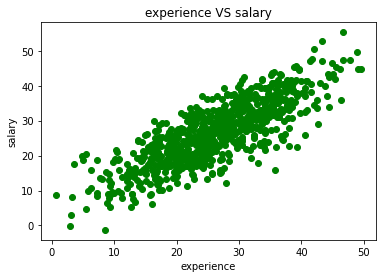

In [7]:
#Experience vs Salary scatter plot
plt.scatter(train_experience,train_salary,color = 'green')
plt.xlabel("experience")
plt.ylabel("salary")
plt.title("experience VS salary")
plt.show()

In [8]:
# Prediction Function
# A function to predict salary based on experience, slope, and y-intercept is defined

def predict(slope,y_intercept,experience):
  predicted_values = (slope * experience) + y_intercept
  return predicted_values

In [9]:
# Cost Function
# The cost function (mean squared error) is implemented to measure the accuracy of the model

def cost_function(experience,salary,predicted_values):
  sum = 0
  size = len(experience)# total no of data in the dataset
  # print(size)
  for i in range(size):
    loss_function = (salary[i] - predicted_values[i]) ** 2
    sum += loss_function
  cost = sum/(2*size)
  return cost

In [10]:
# Gradient Descent
# The gradient descent algorithm is used to minimize the cost function
# by finding the optimal slope and y-intercept:

def gradient_descent(slope,y_intercept,experience,salary,learning_rate):

  slopes = []
  y_intercepts = []
  cost_functions = []
  # slope_learning_rate = 0.00025
  # intercept_learning_rate = 0.88
  iterations = 1000
  size = len(experience)

  predicted_values = predict(slope,y_intercept,experience)

  prev_cost_function = cost_function(experience,salary,predicted_values)


  for i in range(iterations):
    predicted_values = predict(slope,y_intercept,experience)

    curr_cost_function = cost_function(experience,salary,predicted_values)

    cost_functions.append(curr_cost_function)

    sum_slope = 0
    sum_y_intercept = 0

    for j in range(size):

      slope_derivative = (salary[j] - predicted_values[j]) * experience[j] * -1
      sum_slope += slope_derivative

      y_intercept_derivative = (salary[j] - predicted_values[j]) * -1
      sum_y_intercept += y_intercept_derivative

    slope_derivative = sum_slope/size

    slope = slope - (learning_rate * slope_derivative)

    slopes.append(slope)

    y_intercept_derivative = sum_y_intercept/size

    y_intercept = y_intercept - (learning_rate * y_intercept_derivative)

    y_intercepts.append(y_intercept)

    #print(f"{i}  slope = {slope} , y_intercept = {y_intercept} , cost function = {curr_cost_function}")

    if(curr_cost_function > prev_cost_function):
      print(curr_cost_function, " " ,prev_cost_function )
      break;
    else:
      prev_cost_function = curr_cost_function

  #print(f"final slope = {slope} and final y-intercept = {y_intercept}")

  return [slope,y_intercept,slopes,y_intercepts,cost_functions]


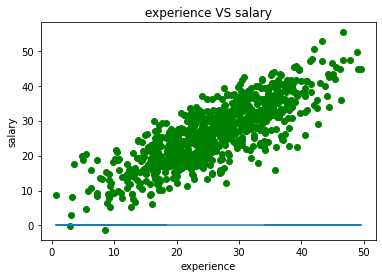

In [11]:
# Initial Regression Line WITH SLOPE = 0 AND Y-INTERCEPT = 0

slope = 0
y_intercept = 0
predicted_values = predict(slope,y_intercept,train_experience)

#print(predicted_values)
#initial regression line
plt.scatter(train_experience,train_salary,color = 'green')
plt.xlabel("experience")
plt.ylabel("salary")
plt.title("experience VS salary")
plt.plot(train_experience,predicted_values)
plt.show()


In [12]:
#cost function value of initial regression

cost = cost_function(train_experience,train_salary,predicted_values)
print(f"Initial cost = {cost}")

Initial cost = 389.04074273689366


In [13]:
#The initial cost function value is very high.
# Hence we need to find the optimized value of slope
# and y-intercept using gradient descent

result = gradient_descent(slope,y_intercept,train_experience,train_salary,0.0001)
slope = result[0]
y_intercept = result[1]
slopes = result[2]
y_intercepts = result[3]
cost_functions = result[4]
print(f"optimized slope = {slope} optimized y-intercept = {y_intercept}")

optimized slope = 0.9955439676281564 optimized y-intercept = 0.08631769237771686


In [14]:
#MINIMIZED COST FUNCTION
predicted_values = predict(slope,y_intercept,train_experience)
cost = cost_function(train_experience,train_salary,predicted_values)
print(f"Cost = {cost}")

Cost = 14.746125885500085


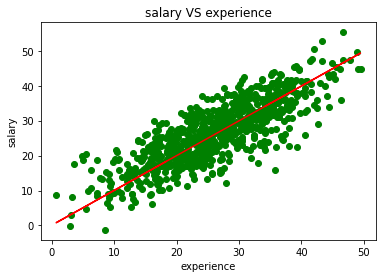

In [15]:
#BEST FITTING REGRESSION LINE WITH OPTIMIZED SLOPE AND Y-INTERCEPT VALUES
plt.scatter(train_experience,train_salary,color = 'green')
plt.xlabel("experience")
plt.ylabel("salary")
plt.title("salary VS experience")

plt.plot(train_experience,predicted_values,color = 'red')
plt.show()

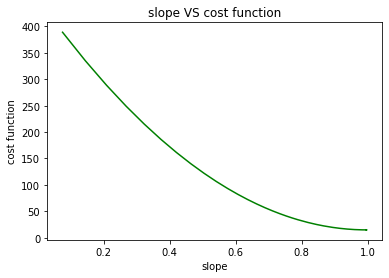

In [16]:
# OPTIMIZING THE SLOPE TO MINIMIZE THE COST FUNCTION USING GRADIENT DESCENT
plt.plot(slopes,cost_functions,color = 'green')
plt.xlabel("slope")
plt.ylabel("cost function")
plt.title("slope VS cost function")
plt.show()

Text(0.5, 1.0, 'y-intercept VS cost function')

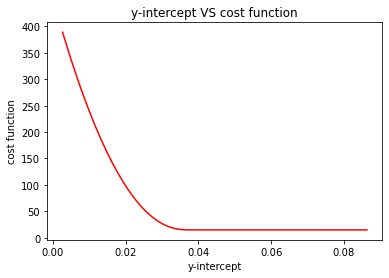

In [17]:
# OPTIMIZING THE Y-INTERCEPT TO MINIMIZE THE COST FUNCTION USING GRADIENT DESCENT
plt.plot(y_intercepts,cost_functions,color = 'red')
plt.xlabel("y-intercept")
plt.ylabel("cost function")
plt.title("y-intercept VS cost function")

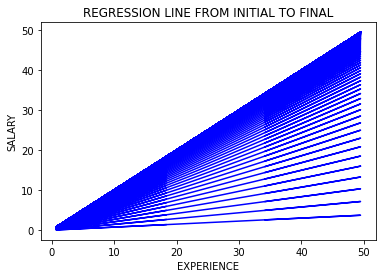

In [18]:
#PLOTTING ALL THE REGRESSION LINES FROM INITAL TO FINAL STAGE

for i in range(0,len(slopes)):
    predicted_values = predict(slopes[i],y_intercepts[i],train_experience)
    plt.plot(train_experience,predicted_values,color = 'blue')
plt.title("REGRESSION LINE FROM INITIAL TO FINAL")
plt.xlabel("EXPERIENCE")
plt.ylabel("SALARY")
plt.show()